# **INTRODUÇÃO**

Esta documentação aborda a Etapa 1: Pré-processamento dos Dados, que é o primeiro passo fundamental no desenvolvimento do trabalho prático final. O foco desta etapa está em três atividades principais:

* Representar a modelagem do problema utilizando estruturas de dados baseadas em grafos.

* Implementar a leitura de dados fornecidos em arquivos de teste.

* Calcular métricas importantes relacionadas aos grafos, como quantidade de vértices, arestas e arcos, além de informações como densidade e diâmetro.

O problema estudado é inspirado em desafios logísticos, que têm papel essencial na otimização do fluxo de bens e serviços, resultando em maior eficiência e redução de custos para empresas e consumidores. A análise detalhada de processos logísticos permite identificar problemas para melhorar o planejamento de rotas, gerenciar estoques de maneira mais eficaz e implementar tecnologias que aprimoram a tomada de decisões.

Nesta etapa inicial, o grafo será modelado como um conjunto de vértices, arestas e arcos, representando interseções e vias de acesso. Por meio desta modelagem, serão calculadas métricas essenciais para compreender as propriedades e características do grafo, como o grau dos vértices, a densidade do grafo e o caminho médio.

Com essa abordagem, espera-se garantir uma representação clara e eficiente dos dados, possibilitando uma análise detalhada e proporcionando suporte às etapas posteriores do projeto.

**DEFINIÇÃO FORMAL**

O problema base pode ser definido em um grafo conexo G = (V,E), onde V é
 o conjunto de nós e E o conjunto de arestas. Os nós representam interseções
 (ou esquinas) em uma região (urbana ou rural), enquanto as arestas são as vias
 de acesso (ruas, avenidas, etc). Um subconjunto ER ⊆ E dessas arestas deve
 ser atendido. Seja n = |ER| o número de serviços. Uma aresta (i,j) ∈ E
 pode ser percorrida qualquer número de vezes com um custo de cij cada vez, e
 uma demanda de qij está associada a qualquer aresta (i,j) ∈ ER. O problema
 visa encontrar um conjunto de viagens de veículos com custo mínimo,
 tal que cada viagem comece e termine em um nó depósito v0 ∈ V, cada aresta
 requerida seja atendida por uma única viagem, e a demanda total para qualquer
 veículo não exceda uma capacidade Q.
 Avariação estudada no trabalho prático redefine G, em particular, como um
 multigrafo conectado G = (V,E,A), onde V é o conjunto de nós, E o conjunto
 1
de arestas e A o conjunto de arcos (vias de mão única). Serviços são requeridos
 para um subconjunto de nós VR ⊆ V, arestas ER ⊆ E e arcos AR ⊆ A, tal que
 n =|VR|+|ER|+|AR|.

# **INICIO DO PROJETO**

Os dados dos grafos estão em arquivos com uma estrutura específica, contendo dados de posição dos vertices arcos e arestas. A modelagem representa o grafo em uma matriz de adjacência onde contém 0 para indicar que não há ligações entre os vértices i e j e o nome da aresta ou arco para indicar que há ligação, isso será visto posteriormente neste documento.

# Leitura dos Arquivos

A leitura dos dados inicia com a função selecionarArquivo, que permite ao usuário escolher entre utilizar um caminho padrão para o arquivo ou fornecer um novo caminho manualmente. Em um loop interativo, o programa solicita uma entrada válida, verificando se o usuário opta por usar o caminho padrão "/content/mggdb_0.25_7.dat", que neste exemplo contém um arquivo, ou digitar um novo. Dependendo da escolha, a variável nomeArquivo é preenchida com o respectivo caminho, garantindo que o programa prossiga somente após a seleção correta. Essa abordagem promove flexibilidade e assegura que o arquivo correto seja fornecido para as próximas etapas de processamento.

**Observação:** O caminho padrão só está ai para exemplificar as respostas de saída padrão que estão neste documento, você pode colocar outros arquivos com a mesma estrutura, porém os exemplos nas saídas esperadas serão diferentes.

In [1]:
# Pergunta ao usuário se deseja usar o caminho padrão ou fornecer um novo
def selecionarArquivo():
    caminho_padrao = "/content/mggdb_0.25_7.dat"
    nomeArquivo = None

    while nomeArquivo is None:  # Continua até que o usuário forneça entrada válida
        escolha = input("Deseja usar o caminho padrão do arquivo? (s/n): ").lower()

        if escolha == "s":
            nomeArquivo = caminho_padrao
        elif escolha == "n":
            nomeArquivo = input("Digite o caminho do arquivo: ")
        else:
            print("Opção inválida. Por favor, digite 's' para sim ou 'n' para não.")

    return nomeArquivo

# Obter o caminho do arquivo
nomeArquivo = selecionarArquivo()

Deseja usar o caminho padrão do arquivo? (s/n): k
Opção inválida. Por favor, digite 's' para sim ou 'n' para não.
Deseja usar o caminho padrão do arquivo? (s/n): 4
Opção inválida. Por favor, digite 's' para sim ou 'n' para não.
Deseja usar o caminho padrão do arquivo? (s/n): n
Digite o caminho do arquivo: /content/mggdb_0.25_7.dat


A função lerCabecalho foi projetada para realizar a leitura e extração de informações essenciais do cabeçalho de um arquivo de entrada estruturado. Ela organiza esses dados em um dicionário, permitindo o armazenamento de valores como o nome do arquivo, quantidade de veículos, capacidade dos veículos, número de nós, arestas, arcos e outras informações relevantes. Esse formato facilita o acesso e manipulação dos dados necessários para as etapas subsequentes do programa, como cálculos, análises ou processamento adicional. A função é fundamental para estruturar e simplificar o uso dos dados ao longo do desenvolvimento.



In [2]:
# Importando a biblioteca pandas para exibição dos dados
import pandas as pd

# Função para ler o cabeçalho do arquivo fornecido e retornar os dados como um dicionário
def lerCabecalho(nomeArquivo):
    cabecalho = {}

    try:
        # Abre o arquivo no modo de leitura
        with open(nomeArquivo, "r") as file:
            cabecalho["Nome"] = file.readline().strip().split("\t\t")[1]
            cabecalho["ValorOtimo"] = int(file.readline().strip().split("\t")[1])
            cabecalho["QtdVeiculos"] = int(file.readline().strip().split("\t")[1])
            cabecalho["Capacidade"] = int(file.readline().strip().split("\t")[1])
            cabecalho["NoDeposito"] = int(file.readline().strip().split("\t")[1])
            cabecalho["Nos"] = int(file.readline().strip().split("\t\t")[1])
            cabecalho["Arestas"] = int(file.readline().strip().split("\t\t")[1])
            cabecalho["Arcos"] = int(file.readline().strip().split("\t\t")[1])
            cabecalho["NosObrig"] = int(file.readline().strip().split("\t")[1])
            cabecalho["ArestasObrig"] = int(file.readline().strip().split("\t")[1])
            cabecalho["ArcosObrig"] = int(file.readline().strip().split("\t")[1])
            # Lê linha vazia
            file.readline()
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

    return cabecalho

# Variável que armazena o cabeçalho
cabecalho = lerCabecalho(nomeArquivo)

# Exibir os dados como uma tabela
df_cabecalho = pd.DataFrame([cabecalho])
print("Visualização do cabeçalho como tabela:")
df_cabecalho


Visualização do cabeçalho como tabela:


,Nome,ValorOtimo,QtdVeiculos,Capacidade,NoDeposito,Nos,Arestas,Arcos,NosObrig,ArestasObrig,ArcosObrig
0,mggdb_0.25_7,290,5,5,1,12,5,34,5,3,12


Depois de lido o cabeçalho, lê-se os nós obrigatóris com a função lerNosObrigatorios, que tem como objetivo extrair informações sobre os nós obrigatórios de um arquivo de entrada, que contém dados estruturados. Esses nós obrigatórios incluem informações como demandas e custos de serviço, e os dados são armazenados em um dicionário organizado para facilitar o processamento posterior.

In [3]:
def lerNosObrigatorios(nomeArquivo, cabecalho):
    # Dicionário para armazenar os dados no formato desejado
    nosObrigatorios = {}

    try:
        # Abre o arquivo no modo leitura
        with open(nomeArquivo, "r") as file:
            # Pula as primeiras 13 linhas( Cabecalho e linhas em branco)
            for i in range(13):
                file.readline()

            # Lê o número de nós obrigatórios definido no cabeçalho
            for i in range(cabecalho["NosObrig"]):
                # Lê uma linha e separa os valores por tabulação
                linha = file.readline().strip().split("\t")
                no = linha[0]  # Nome do nó (ex: "N2")
                demanda = int(linha[1])  # Demanda (convertida para inteiro)
                custo_servico = int(linha[2])  # Custo de serviço (convertido para inteiro)
                # Adiciona ao dicionário no formato desejado
                nosObrigatorios[no] = {"Demand": demanda, "Service Cost": custo_servico}

    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

    # Retorna o dicionário com os dados extraídos
    return nosObrigatorios

# Exibir os dados como uma tabela
nosObrig = lerNosObrigatorios(nomeArquivo, cabecalho)
df_nosObrig = pd.DataFrame.from_dict(nosObrig, orient="index")
print("Tabela dos Nós Obrigatórios:")
df_nosObrig


Tabela dos Nós Obrigatórios:


,Demand,Service Cost
N2,2,2
N4,1,1
N5,2,2
N6,1,1
N7,1,1


Assim, agora executa a função lerArestasObrigatorias que é é responsável por ler as arestas obrigatórias, processá-las e retorná-las em uma lista estruturada. Cada aresta obrigatória inclui informações como origem, destino, custo de transporte, demanda e custo de serviço.

In [4]:
def lerArestasObrigatorias(nomeArquivo, cabecalho):
    # Lista para armazenar as arestas obrigatórias no formato desejado
    arestasObrigatorias = []

    try:
        # Abre o arquivo no modo leitura
        with open(nomeArquivo, "r") as file:
            # Pula as primeiras 15 linhas (Cabecalho e linhas em branco) e depois a
            #    quantidade de dados lidos anteriormente
            for i in range(15 + cabecalho["NosObrig"]):
                file.readline()

            # Lê o número de arestas obrigatórias definido no cabeçalho para ver a
            #     quantidade de dados existentes para leitura
            for i in range(cabecalho["ArestasObrig"]):  # Exemplo: {"ArestasObrig": 3}
                # Lê uma linha da seção ReE e separa os valores
                linha = file.readline().strip().split("\t")
                aresta = {
                    "Name": linha[0],                 # Nome da aresta (ex: "E3")
                    "From": f"N{linha[1]}",           # Nó de origem
                    "To": f"N{linha[2]}",             # Nó de destino
                    "Transport Cost": int(linha[3]),  # Custo de transporte
                    "Demand": int(linha[4]),          # Demanda
                    "Service Cost": int(linha[5])     # Custo de serviço
                }
                arestasObrigatorias.append(aresta)  # Adiciona a aresta à lista

    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

    # Retorna a lista com as arestas obrigatórias
    return arestasObrigatorias

# Ler as arestas obrigatórias
arestasObrig = lerArestasObrigatorias(nomeArquivo, cabecalho)

# Transformar em DataFrame para exibição em formato de tabela
df_arestasObrig = pd.DataFrame(arestasObrig)

# Exibir os dados das arestas obrigatórias no formato de tabela
print("Tabela das Arestas Obrigatórias:")
df_arestasObrig


Tabela das Arestas Obrigatórias:


,Name,From,To,Transport Cost,Demand,Service Cost
0,E3,N7,N8,8,1,1
1,E4,N2,N4,9,1,1
2,E5,N9,N10,16,1,1


A função lerArestasNaoObrigatorias é responsável por processar e organizar as arestas não obrigatórias de um arquivo de entrada. A estrutura das arestas é formatada em uma lista com informações como nó de origem, nó de destino e custo de transporte.

In [5]:
def lerArestasNaoObrigatorias(nomeArquivo, cabecalho):
    # Lista para armazenar as arestas não obrigatórias no formato desejado
    arestasNaoObrigatorias = []

    try:
        # Abre o arquivo no modo leitura
        with open(nomeArquivo, "r") as file:
            # Pula as primeiras 17 linhas (Cabecalho e linhas em branco) e depois a
            #    quantidade de dados lidos anteriormente
            for i in range(17 + cabecalho["NosObrig"] + cabecalho["ArestasObrig"]):
                file.readline()

            # Lê o número de arestas não obrigatórias definido no cabeçalho
            for i in range(cabecalho["Arestas"] - cabecalho["ArestasObrig"]):  # Exemplo: {"ArestasNaoObrig": 2}
                # Lê uma linha da seção EDGE e separa os valores
                linha = file.readline().strip().split("\t")
                aresta = {
                    "Name": linha[0],                 # Nome da aresta (ex: "NrE1")
                    "From": f"N{linha[1]}",           # Nó de origem
                    "To": f"N{linha[2]}",             # Nó de destino
                    "Transport Cost": int(linha[3])   # Custo de transporte
                }
                arestasNaoObrigatorias.append(aresta)  # Adiciona a aresta à lista

    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

    # Retorna a lista com as arestas não obrigatórias
    return arestasNaoObrigatorias

#Variavel que armazena os dados das arestas não obrigatorias
arestasNaoObrig = lerArestasNaoObrigatorias(nomeArquivo, cabecalho)

# Transformar em DataFrame para exibição em formato de tabela
df_arestasNaoObrig = pd.DataFrame(arestasNaoObrig)

# Exibir os dados das arestas não obrigatórias no formato de tabela
print("Tabela das Arestas Não Obrigatórias:")
df_arestasNaoObrig


Tabela das Arestas Não Obrigatórias:


,Name,From,To,Transport Cost
0,NrE1,N5,N12,11
1,NrE2,N5,N11,20


A função lerArcosObrigatorios é responsável por processar e extrair os arcos obrigatórios a partir de um arquivo de entrada com dados estruturados. Esses arcos incluem informações como origem, destino, custo de transporte, demanda e custo de serviço. Os dados extraídos são organizados em uma lista estruturada para uso posterior.

In [6]:
def lerArcosObrigatorios(nomeArquivo, cabecalho):
    # Lista para armazenar os arcos obrigatórios no formato desejado
    arcosObrigatorios = []

    try:
        # Abre o arquivo no modo leitura
        with open(nomeArquivo, "r") as file:
            # Pula as primeiras linhas até chegar à seção ReA
            for i in range(19 + cabecalho["NosObrig"] + cabecalho["ArestasObrig"] +
                           (cabecalho["Arestas"] - cabecalho["ArestasObrig"])):
                file.readline()

            # Lê o número de arcos obrigatórios definido no cabeçalho
            for i in range(cabecalho["ArcosObrig"]):  # Exemplo: {"ArcosObrig": 12}
                # Lê uma linha da seção ReA e separa os valores
                linha = file.readline().strip().split("\t")
                arco = {
                    "Name": linha[0],                 # Nome do arco (ex: "A6")
                    "From": f"N{linha[1]}",           # Nó de origem
                    "To": f"N{linha[2]}",             # Nó de destino
                    "Transport Cost": int(linha[3]),  # Custo de transporte
                    "Demand": int(linha[4]),          # Demanda
                    "Service Cost": int(linha[5])     # Custo de serviço
                }
                arcosObrigatorios.append(arco)  # Adiciona o arco à lista
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

    # Retorna a lista com os arcos obrigatórios
    return arcosObrigatorios

#Variavel que armazena os arcos obrigatórios e seus dados
arcosObrig = lerArcosObrigatorios(nomeArquivo, cabecalho)

# Transformar em DataFrame para exibição em formato de tabela
df_arcosObrig = pd.DataFrame(arcosObrig)

# Exibir os dados no formato de tabela
print("Tabela das Arcos Obrigatórios:")
df_arcosObrig

Tabela das Arcos Obrigatórios:


,Name,From,To,Transport Cost,Demand,Service Cost
0,A6,N3,N5,5,1,1
1,A7,N8,N10,3,1,1
2,A8,N1,N2,13,1,1
3,A9,N3,N4,20,1,1
4,A10,N9,N11,14,1,1
5,A11,N1,N7,19,1,1
6,A12,N1,N10,19,1,1
7,A13,N10,N11,12,1,1
8,A14,N8,N11,10,1,1
9,A15,N6,N7,4,1,1


A função lerArcosNaoObrigatorios tem como propósito identificar e processar os arcos não obrigatórios presentes em um arquivo de entrada com estrutura definida. Ela organiza as informações dos arcos em uma lista estruturada contendo campos como origem, destino e custo de transporte, facilitando o uso desses dados nas etapas subsequentes.

In [7]:
def lerArcosNaoObrigatorios(nomeArquivo, cabecalho):
    # Lista para armazenar os arcos não obrigatórios
    arcosNaoObrigatorios = []

    try:
        # Abre o arquivo no modo leitura
        with open(nomeArquivo, "r") as file:
            # Pula as primeiras linhas até chegar à seção ARC
            for i in range(21 + cabecalho["NosObrig"] + cabecalho["ArestasObrig"] +
                           (cabecalho["Arestas"] - cabecalho["ArestasObrig"]) + cabecalho["ArcosObrig"]):
                file.readline()

            # Lê o número de arcos não obrigatórios definido no cabeçalho
            for i in range(cabecalho["Arcos"] - cabecalho["ArcosObrig"]):  # Exemplo: {"ArcosNaoObrig": 18}
                # Lê uma linha da seção ARC e separa os valores
                linha = file.readline().strip().split("\t")
                arco = {
                    "Name": linha[0],                 # Nome do arco (ex: "NrA1")
                    "From": f"N{linha[1]}",           # Nó de origem
                    "To": f"N{linha[2]}",             # Nó de destino
                    "Transport Cost": int(linha[3])   # Custo de transporte
                }
                arcosNaoObrigatorios.append(arco)  # Adiciona o arco à lista

    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

    # Retorna a lista com os arcos não obrigatórios
    return arcosNaoObrigatorios

#variavel que armazena os arcos não obrigatórios
arcosNaoObrig = lerArcosNaoObrigatorios(nomeArquivo, cabecalho)

# Transformar em DataFrame para exibição em formato de tabela
df_arcosNaoObrig = pd.DataFrame(arcosNaoObrig)

# Exibir os dados no formato de tabela
print("Tabela das Arcos Não Obrigatórias:")
df_arcosNaoObrig

Tabela das Arcos Não Obrigatórias:


,Name,From,To,Transport Cost
0,NrA1,N2,N3,18
1,NrA2,N1,N4,17
2,NrA3,N2,N9,2
3,NrA4,N6,N11,3
4,NrA5,N7,N12,18
5,NrA18,N3,N2,18
6,NrA19,N4,N1,17
7,NrA20,N9,N2,2
8,NrA21,N11,N6,3
9,NrA22,N12,N7,18


# Estatísticas e Armazenamento de Dados

A função criar_matriz_adjacencia tem como propósito construir uma matriz de adjacência para representar os grafos fornecidos, utilizando nós obrigatórios, arestas obrigatórias e não obrigatórias, além de arcos obrigatórios e não obrigatórios. A matriz é um modelo eficiente para armazenar conexões entre nós, indicando as relações bidirecionais ou direcionadas entre eles, ela tem o tamanho N x N, onde N é a quantidade de vértices e em vez de 0 para indicar que não há ligação e 1 para indicar que há, ela usa o 0 para indicar que não há ligação e o nome do arco ou aresta para indicar que há.

In [8]:
#importações para mostrar o grafo
import networkx as nx
import matplotlib.pyplot as plt

def criar_matriz_adjacencia(nosObrig, arestasObrig, arestasNaoObrig, arcosObrig, arcosNaoObrig):
    # Criar um conjunto para armazenar todos os números de nós encontrados
    nos = set()

    # Adicionar os números dos nós obrigatórios
    for no in nosObrig.keys():
        numero_do_no = int(no[1:])  # Remove o "N" e pega o número do nó
        nos.add(numero_do_no)

    # Função auxiliar para adicionar nós de uma ligação (aresta ou arco)
    def adicionar_nos_ligacao(ligacao):
        # Usamos as chaves "From" e "To", conforme os dados fornecidos
        nos.add(int(ligacao["From"][1:])) #Remove o "N" e adiciona tranformando para inteiro
        nos.add(int(ligacao["To"][1:]))

    # Adicionar nós das arestas obrigatórias e não obrigatórias
    for aresta in arestasObrig:
        adicionar_nos_ligacao(aresta)
    for aresta in arestasNaoObrig:
        adicionar_nos_ligacao(aresta)

    # Adicionar nós dos arcos obrigatórios e não obrigatórios
    for arco in arcosObrig:
        adicionar_nos_ligacao(arco)
    for arco in arcosNaoObrig:
        adicionar_nos_ligacao(arco)

    # Determinar o maior número de nó. Caso não existam nós, definir como 0
    if len(nos) > 0:
        numero_maximo_de_nos = max(nos)
    else:
        numero_maximo_de_nos = 0

    # Criar a matriz de adjacência, preenchendo com 0
    matriz = []
    for i in range(numero_maximo_de_nos):
        linha = [0] * numero_maximo_de_nos  # Cria uma linha com zeros
        matriz.append(linha)

    # Criar o mapeamento de nomes dos nós (ex.: "N1") para índices na matriz
    mapeamento = {}
    contador = 0
    for i in range(1, numero_maximo_de_nos + 1):
        mapeamento[f"N{i}"] = contador
        contador += 1

    # Função auxiliar para adicionar uma conexão na matriz
    def adicionar_conexao(origem, destino, nome, bidirecional=True):
        matriz[mapeamento[origem]][mapeamento[destino]] = nome  # Adiciona o valor à matriz
        if bidirecional:
            # Se for bidirecional, adiciona no outro sentido
            matriz[mapeamento[destino]][mapeamento[origem]] = nome

    # Adicionar as arestas obrigatórias (bidirecionais)
    for aresta in arestasObrig:
        adicionar_conexao(aresta["From"], aresta["To"], aresta["Name"], bidirecional=True)

    # Adicionar as arestas não obrigatórias (bidirecionais)
    for aresta in arestasNaoObrig:
        adicionar_conexao(aresta["From"], aresta["To"], aresta["Name"], bidirecional=True)

    # Adicionar os arcos obrigatórios (direcionados)
    for arco in arcosObrig:
        adicionar_conexao(arco["From"], arco["To"], arco["Name"], bidirecional=False)

    # Adicionar os arcos não obrigatórios (direcionados)
    for arco in arcosNaoObrig:
        adicionar_conexao(arco["From"], arco["To"], arco["Name"], bidirecional=False)

    # Retorna a matriz de adjacência e o mapeamento de nós
    return matriz, mapeamento

# variaveis que armazenam os dados da matriz de adjacência e do mapeamento dos nós
matriz, mapeamento = criar_matriz_adjacencia(nosObrig, arestasObrig, arestasNaoObrig, arcosObrig, arcosNaoObrig)

# Transformar a matriz em um DataFrame para exibição formatada
df_matriz = pd.DataFrame(matriz, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Adjacência como Tabela:")
df_matriz

Matriz de Adjacência como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,0,A8,0,NrA2,0,0,A11,0,0,A12,A17,A16
N2,NrA25,0,NrA1,E4,0,0,0,0,NrA3,0,0,0
N3,0,NrA18,0,A9,A6,0,0,0,0,0,0,0
N4,NrA19,E4,NrA26,0,0,0,0,0,0,0,0,0
N5,0,0,NrA23,0,0,0,0,0,0,0,NrE2,NrE1
N6,0,0,0,0,0,0,A15,0,0,0,NrA4,0
N7,NrA28,0,0,0,0,NrA32,0,E3,0,0,0,NrA5
N8,0,0,0,0,0,0,E3,0,0,A7,A14,0
N9,0,NrA20,0,0,0,0,0,0,0,E5,A10,0
N10,NrA29,0,0,0,0,0,0,NrA24,E5,0,A13,0


In [9]:
#Transformar o mapeamento em uma tabela
df_mapeamento = pd.DataFrame(list(mapeamento.items()), columns=["Nó", "Índice"])

#Exibindo mapeamento como tabela
print("Mapeamento como Tabela:")
df_mapeamento

Mapeamento como Tabela:


,Nó,Índice
0,N1,0
1,N2,1
2,N3,2
3,N4,3
4,N5,4
5,N6,5
6,N7,6
7,N8,7
8,N9,8
9,N10,9


A função exibirGrafo é responsável por criar e exibir graficamente um grafo misto com base em uma matriz de adjacência (matriz) e um mapeamento de nós (mapeamento). Inicialmente, ela utiliza a biblioteca igraph para criar o grafo, adicionando vértices e conexões baseados na matriz fornecida. As conexões são categorizadas como arestas bidirecionais ou arcos unidirecionais, com rótulos e cores atribuídos para melhorar a clareza visual. A disposição dos nós é organizada com o layout Fruchterman-Reingold, garantindo espaçamento adequado entre eles. Por fim, a função utiliza o matplotlib para exibir o grafo, destacando os nós em azul e as arestas em verde, além de exibir rótulos informativos. Essa função é ideal para interpretar e analisar a estrutura de redes complexas de forma visual e interativa.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.6 MB/s eta 0:00:00


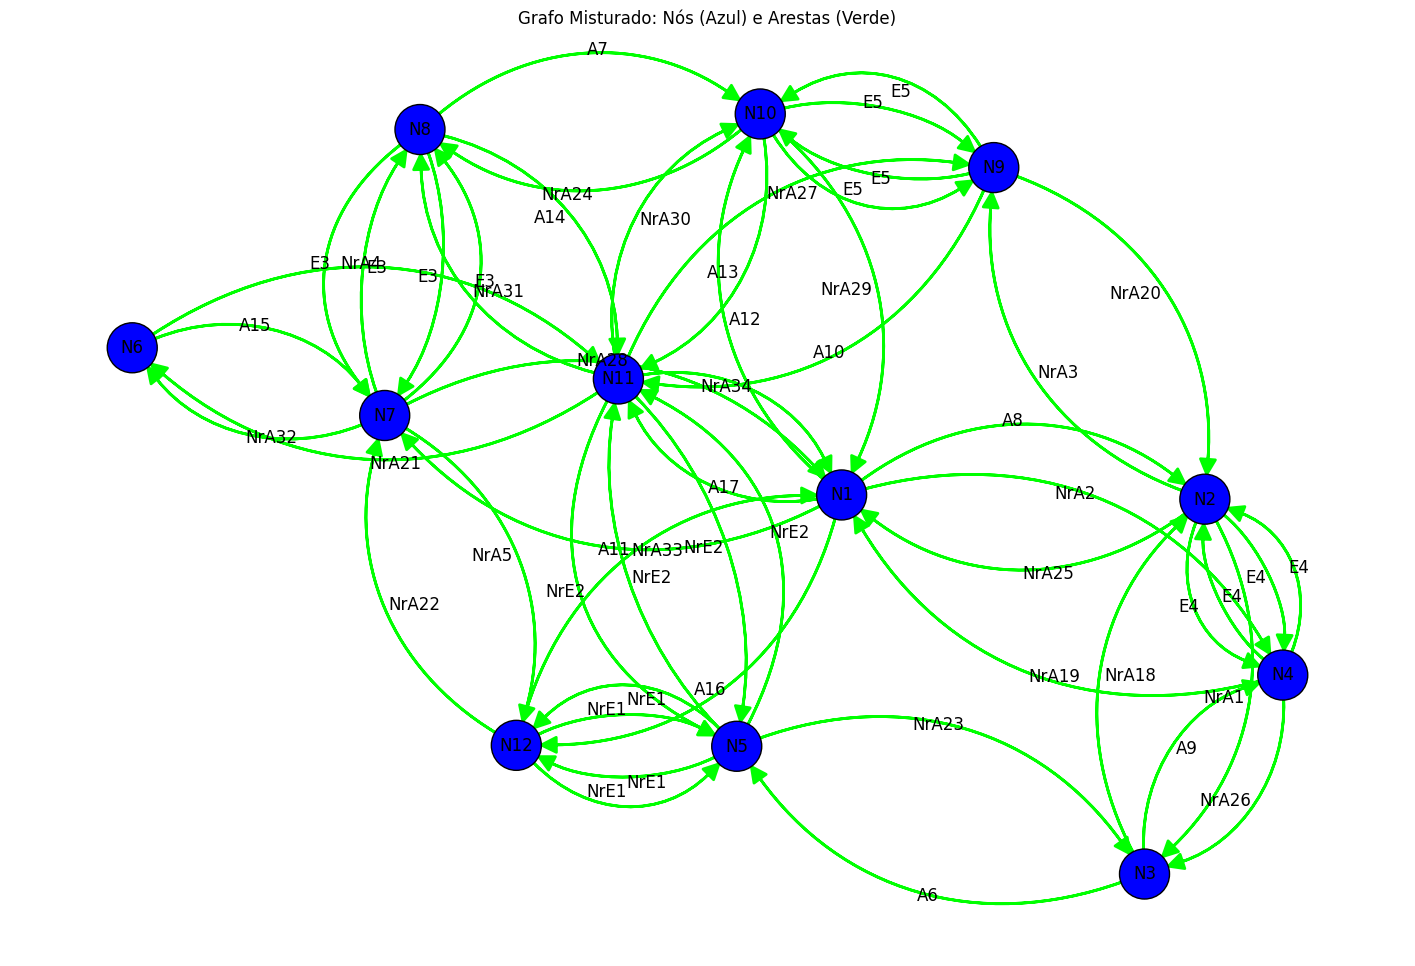

In [10]:
def exibirGrafo(matriz, mapeamento):
  #instalando bibliotecas no Google Colab
  !pip install igraph
  !pip install python-igraph

  #Importanto bibliotecas para a criação do grafo
  from igraph import Graph, plot
  import matplotlib.pyplot as plt

  # Criar o grafo misto
  grafo_misto = Graph(directed=True)

  # Criar os nós (o número de vértices deve ser previamente informado)
  n_nos = len(mapeamento)  # Baseado no mapeamento
  grafo_misto.add_vertices(n_nos)

  # Adicionar conexões ao grafo
  for i in range(len(matriz)):
      for j in range(len(matriz[i])):
          if matriz[i][j] != 0:  # Só adiciona conexões válidas
              if "E" in str(matriz[i][j]) or "NrE" in str(matriz[i][j]):  # Arestas bidirecionais
                  grafo_misto.add_edges([(i, j), (j, i)])  # Conexões bidirecionais
                  grafo_misto.es[-2]["label"] = matriz[i][j]  # Nome da conexão
                  grafo_misto.es[-1]["label"] = matriz[i][j]
              elif "A" in str(matriz[i][j]) or "NrA" in str(matriz[i][j]):  # Arcos unidirecionais
                  grafo_misto.add_edge(i, j)  # Conexão unidirecional
                  grafo_misto.es[-1]["label"] = matriz[i][j]  # Nome da conexão

  # Adicionar rótulos para os nós
  for i, nome_no in enumerate(mapeamento.keys()):
      grafo_misto.vs[i]["name"] = nome_no  # Nomeia os nós

  # Configurar cores para as arestas
  cores = []
  for edge in grafo_misto.es:
      cores.append("green")  # Verde para todas as arestas
  grafo_misto.es["color"] = cores

  # Configurar cor e tamanho dos nós
  for v in grafo_misto.vs:
      v["color"] = "blue"  # Azul para nós
  grafo_misto.vs["size"] = 50  # Nós ainda maiores para melhorar visualização

  # Melhorar ainda mais o espaçamento do layout
  layout = grafo_misto.layout("fr")  # Fruchterman-Reingold layout
  layout.scale(5)  # Escala ainda maior para espaçamento máximo entre os nós

  # Visualizar o grafo usando matplotlib
  plt.figure(figsize=(18, 12))  # Tamanho maior da figura para mais clareza
  plot(
      grafo_misto,
      layout=layout,
      vertex_label=[v["name"] for v in grafo_misto.vs],
      vertex_color=[v["color"] for v in grafo_misto.vs],
      vertex_size=grafo_misto.vs["size"],  # Tamanho ajustado dos nós
      edge_color=grafo_misto.es["color"],
      edge_label=grafo_misto.es["label"],  # Exibir os rótulos das arestas/arcos
      target=plt.gca()  # Garante que a visualização esteja no matplotlib
  )
  plt.title("Grafo Misturado: Nós (Azul) e Arestas (Verde)")
  plt.show()

#Função para exibir o grafo
exibirGrafo(matriz, mapeamento)


As estatísticas iniciam com a função qtdVertices, que retorna o número total de vértices presentes no grafo, representando os pontos de intersecção ou nós, pegando esse dado do cabecalho.

In [11]:
# Função que obtém o número de vértices pegando o dado do cabeçalho
def qtdVertices(cabecalho):
    return cabecalho["Nos"]

# Print do resultado da função
print("Mostrando quantidade de Vértices: ")
print(qtdVertices(cabecalho))

Mostrando quantidade de Vértices: 
12


Já a função qtdArestas retorna a quantidade total de arestas, que são as conexões bidirecionais entre os vértices.

In [12]:
# Função que obtém o número de arestas pegando o dado do cabeçalho
def qtdArestas(cabecalho):
    return cabecalho["Arestas"]

# Print do resultado da função
print("Mostrando quantidade de Arestas: ")
print(qtdArestas(cabecalho))

Mostrando quantidade de Arestas: 
5


A função qtdArcos segue a mesma lógica, retornando o número total de arcos, que são conexões unidirecionais entre os nós.

In [13]:
# Função que obtém o número de arcos pegando o dado do cabeçalho
def qtdArcos(cabecalho):
    return cabecalho["Arcos"]

# Print do resultado da função
print("Mostrando quantidade de Arcos: ")
print(qtdArcos(cabecalho))

Mostrando quantidade de Arcos: 
34


A função qtdVerticesObrig retorna a quantidade de nós obrigatórios, os quais representam pontos específicos que devem ser atendidos no problema modelado.

In [14]:
# Função que obtém o número de vértices obrigatórios pegando o dado do cabeçalho
def qtdVerticesObrig(cabecalho):
    return cabecalho["NosObrig"]

# Print do resultado da função
print("Mostrando quantidade de Vértices Obrigatórios: ")
print(qtdVerticesObrig(cabecalho))

Mostrando quantidade de Vértices Obrigatórios: 
5


Similarmente, qtdArestasObrig fornece o número de arestas obrigatórias.

In [16]:
# Função que obtém o número de arestas obrigatórias pegando o dado do cabeçalho
def qtdArestasObrig(cabecalho):
    return cabecalho["ArestasObrig"]

# Print do resultado da função
print("Mostrando quantidade de Arestas Obrigatórias: ")
print(qtdArestasObrig(cabecalho))

Mostrando quantidade de Arestas Obrigatórias: 
3


A qtdArcosObrig retorna o total de arcos obrigatórios no grafo.

In [17]:
# Função que obtém o número de arcos obrigatórios pegando o dado do cabeçalho
def qtdArcosObrig(cabecalho):
    return cabecalho["ArcosObrig"]

# Print do resultado da função
print("Mostrando quantidade de Arcos Obrigatórios: ")
print(qtdArcosObrig(cabecalho))

Mostrando quantidade de Arcos Obrigatórios: 
12


A função chamada calcular_densidade, calcula a densidade do grafo mede quão bem conectados os vértices estão em relação ao número máximo possível de conexões. Ela é calculada como a razão entre o número total de conexões no grafo (arestas e arcos) e o número máximo de conexões possíveis.

In [24]:
def calcular_densidade(qtd_vertices, qtd_arestas, qtd_arcos):
    # Caso especial: se não houver vértices ou apenas 1 vértice, densidade é 0
    if qtd_vertices <= 1:
        return 0

    # Fórmula para grafos mistos
    max_conexoes = qtd_vertices * (qtd_vertices - 1)  # Conexões possíveis
    conexoes_totais = (qtd_arestas * 2) + qtd_arcos  # Conexões no grafo
    densidade = conexoes_totais / max_conexoes
    return densidade

#Variável que armazena a densidade do grafo
densidade = calcular_densidade(qtdVertices(cabecalho), qtdArestas(cabecalho), qtdArcos(cabecalho))
print("Densidade do grafo: ")
print(f"{densidade:.2f}")

Densidade do grafo: 
0.33


A função componentes_conectados identifica todos os componentes conectados de um grafo representado por uma matriz de adjacência (matriz) e um mapeamento de nós (mapeamento). Utilizando uma abordagem de busca em profundidade (DFS), ela percorre o grafo para agrupar os nós que estão diretamente ou indiretamente conectados, formando componentes individuais. Inicialmente, uma lista marca quais nós já foram visitados, enquanto outra lista armazena os componentes. Cada componente é criado por explorar recursivamente as conexões entre os nós até que todos sejam visitados. A função retorna os componentes conectados, que consistem em grupos de nós relacionados.

In [30]:
def componentes_conectados(matriz, mapeamento):
    # Número de nós no grafo
    n = len(matriz)

    # Lista para saber quais nós já foram visitados
    visitado = [False] * n

    # Lista para armazenar os componentes
    componentes = []

    # Cria um mapeamento inverso para converter índice em nome do nó
    indices_para_nomes = {}
    for k, v in mapeamento.items():
        indices_para_nomes[v] = k

    # Função auxiliar para a DFS
    def dfs(no_atual, componente):
        visitado[no_atual] = True
        componente.append(indices_para_nomes[no_atual])  # Adiciona o nó ao componente

        # Percorre todos os vizinhos
        for vizinho in range(n):
            # Considera ligação apenas na direção especificada (arcos são direcionados)
            if matriz[no_atual][vizinho] != 0 and not visitado[vizinho]:
                dfs(vizinho, componente)

    # Percorre todos os nós
    for no in range(n):
        if not visitado[no]:
            # Novo componente conectado
            componente = []
            dfs(no, componente)
            componentes.append(componente)

    return componentes

#Variavel que armazena os componetes conectados
componentes = componentes_conectados(matriz, mapeamento)
print(componentes)

# Transformar em DataFrame para exibição
df_componentes = pd.DataFrame({"Componentes Conectados": componentes})

# Exibir os componentes conectados como tabela
print("Tabela de Componentes Conectados:")
df_componentes

[['N1', 'N2', 'N3', 'N4', 'N5', 'N11', 'N6', 'N7', 'N8', 'N10', 'N9', 'N12']]
Tabela de Componentes Conectados:


,Componentes Conectados
0,"[N1, N2, N3, N4, N5, N11, N6, N7, N8, N10, N9,..."


A função calcular_graus calcula o grau total de cada nó em um grafo, considerando as conexões que entram e saem de cada nó. O grau total é definido pelo número de conexões únicas associadas ao nó.
Ela faz isso percorrendo a matriz de adjacência, que representa as conexões entre os nó,
para cada linha da matriz, identifica as conexões que saem do nó,
para cada coluna, identifica as conexões que chegam ao nó.
As conexões são armazenadas em um conjunto (set), o que evita duplicatas e mantém apenas as conexões únicas.
Ao final, a função retorna um dicionário onde a chave é o nome do nó e o valor é o grau total, ajudando a entender a centralidade ou importância de cada nó no grafo. Essa análise é útil em diversas aplicações, como redes sociais e logística

In [31]:
def calcular_graus(matriz, mapeamento):
    n = len(matriz)
    graus_totais = {}  # Dicionário para armazenar o grau total de cada nó

    # Inverte o mapeamento para obter o nome do nó a partir do índice
    indices_para_nomes = {}
    for nome, indice in mapeamento.items():
        indices_para_nomes[indice] = nome

    # Para cada nó, calcula o grau total
    for i in range(n):
        conexoes_unicas = set()  # Estrutura que armazena nomes únicos das conexões

        # Percorre a linha (ligações que saem do nó i)
        for j in range(n):
            if matriz[i][j] != 0:  # Existe uma conexão de i para j
                conexoes_unicas.add(matriz[i][j])  # Armazena o valor da conexão (ex.: "NrA2")

        # Percorre a coluna (ligações que chegam ao nó i)
        for j in range(n):
            if matriz[j][i] != 0:  # Existe uma conexão de j para i
                conexoes_unicas.add(matriz[j][i])  # Armazena o valor da conexão (ex.: "NrA1")

        # O grau total é o tamanho do conjunto de conexões únicas
        graus_totais[indices_para_nomes[i]] = len(conexoes_unicas)

    return graus_totais

#variável que armazena o grau de cada nó
graus = calcular_graus(matriz, mapeamento)

#Transformar o dicionario de graus em uma tabela
df_graus = pd.DataFrame(list(graus.items()), columns=["Nó", "Grau Total"])

#Exibindo mapeamento como tabela
print("Graus como Tabela:")
df_graus

Graus como Tabela:


,Nó,Grau Total
0,N1,12
1,N2,7
2,N3,6
3,N4,5
4,N5,4
5,N6,4
6,N7,7
7,N8,5
8,N9,5
9,N10,7


A função calcular_grau_minimo é usada para determinar o menor grau entre os vértices de um grafo, verificando o menor grau da lista de graus.

In [33]:
#Retorna o menor grau entre os vértices.
def calcular_grau_minimo(graus):
    if not graus:  # Se não houver vértices
        return 0
    return min(graus.values())

#Variável que armazena o gru mínimo do grafo
grauMin = calcular_grau_minimo(graus)
print("Grau Mínimo:")
print(grauMin)


Grau Mínimo:
4


A função calcular_grau_maximo é usada para determinar o menor grau entre os vértices de um grafo, verificando o menor grau da lista de graus.

In [34]:
#Retorna o maior grau entre os vértices.
def calcular_grau_maximo(graus):
    if not graus:  # Se não houver vértices
        return 0
    return max(graus.values())

#Variável que armazena o gru máximo do grafo
grauMax = calcular_grau_maximo(graus)
print("Grau Máximo:")
print(grauMax)

Grau Máximo:
12


A função matriz_pesos_completa constrói quatro matrizes que representam as propriedades de conexão em um grafo: transporte, serviço, demanda e peso total. As matrizes possuem tamanho n x n, onde n é o número de vértices, e são inicializadas com +∞ para conexões inexistentes e 0 na diagonal, exceto a matriz de demanda, que é preenchida inicialmente com zeros.

Cada matriz é atualizada com valores extraídos das arestas e arcos do grafo, diferenciando conexões bidirecionais (arestas) e direcionais (arcos). A matriz de peso total é calculada como a soma dos custos de transporte, serviço e demanda. Após o processamento, a função retorna as quatro matrizes para análise gráfica, facilitando cálculos logísticos como menor custo ou otimização de rotas.

In [35]:
def matriz_pesos_completa(cabecalho, arestasObrig, arestasNaoObrig, arcosObrig, arcosNaoObrig, mapeamento):
    n = cabecalho["Nos"]

    # Inicializa a matriz de transporte com infinito para conexões inexistentes e 0 na diagonal
    matriz_transporte = [[0 if i == j else float('inf') for j in range(n)] for i in range(n)]

    # Inicializa a matriz de serviço com infinito fora da diagonal e 0 na diagonal
    matriz_servico = [[0 if i == j else float('inf') for j in range(n)] for i in range(n)]

    # Para demanda, iniciamos com 0 (pois ausência de ligação = nenhuma demanda)
    matriz_demanda = [[0 for _ in range(n)] for i in range(n)]

    # Matriz de peso total: soma dos outros custos onde houver ligação, infinita caso contrário.
    # Inicializa com infinito para fora da diagonal e 0 na diagonal.
    matriz_total = [[0 if i == j else float('inf') for j in range(n)] for i in range(n)]

    # Função auxiliar para atualizar os valores das matrizes para uma conexão
    def adicionar_valores(origem, destino, transp, servico=0, demanda=0):
        i = mapeamento[origem]
        j = mapeamento[destino]

        # Atualiza as matrizes com os valores fornecidos
        matriz_transporte[i][j] = transp
        matriz_servico[i][j] = servico
        matriz_demanda[i][j] = demanda
        matriz_total[i][j] = transp + servico #+ demanda

    # Processa as ligações de arestas obrigatórias (bidirecionais)
    for aresta in arestasObrig:
        adicionar_valores(
            aresta["From"],
            aresta["To"],
            aresta["Transport Cost"],
            aresta["Service Cost"],
            aresta["Demand"]
        )
        # Atualiza a conexão inversa (bidirecional)
        adicionar_valores(
            aresta["To"],
            aresta["From"],
            aresta["Transport Cost"],
            aresta["Service Cost"],
            aresta["Demand"]
        )

    # Processa as ligações de arestas não obrigatórias (bidirecionais)
    for aresta in arestasNaoObrig:
        adicionar_valores(
            aresta["From"],
            aresta["To"],
            aresta["Transport Cost"]
        )
        adicionar_valores(
            aresta["To"],
            aresta["From"],
            aresta["Transport Cost"]
        )

    # Processa os arcos obrigatórios (unidirecionais)
    for arco in arcosObrig:
        adicionar_valores(
            arco["From"],
            arco["To"],
            arco["Transport Cost"],
            arco["Service Cost"],
            arco["Demand"]
        )

    # Processa os arcos não obrigatórios (unidirecionais)
    for arco in arcosNaoObrig:
        adicionar_valores(
            arco["From"],
            arco["To"],
            arco["Transport Cost"]
        )

    return matriz_transporte, matriz_servico, matriz_demanda, matriz_total

#variavel que armazena a matriz de pesos
matrizDeTransporte, matrizDeServico, matrizDeDemanda, matrizDePesos = matriz_pesos_completa(cabecalho, arestasObrig, arestasNaoObrig, arcosObrig, arcosNaoObrig, mapeamento)

# Transformar a matriz de custo de transporte em um DataFrame para exibição formatada
df_matriz_transporte = pd.DataFrame(matrizDeTransporte, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Custo de Transporte como Tabela:")
df_matriz_transporte

Matriz de Custo de Transporte como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,0.0,13.0,inf,17.0,inf,inf,19.0,inf,inf,19.0,17.0,4.0
N2,13.0,0.0,18.0,9.0,inf,inf,inf,inf,2.0,inf,inf,inf
N3,inf,18.0,0.0,20.0,5.0,inf,inf,inf,inf,inf,inf,inf
N4,17.0,9.0,20.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf
N5,inf,inf,5.0,inf,0.0,inf,inf,inf,inf,inf,20.0,11.0
N6,inf,inf,inf,inf,inf,0.0,4.0,inf,inf,inf,3.0,inf
N7,19.0,inf,inf,inf,inf,4.0,0.0,8.0,inf,inf,inf,18.0
N8,inf,inf,inf,inf,inf,inf,8.0,0.0,inf,3.0,10.0,inf
N9,inf,2.0,inf,inf,inf,inf,inf,inf,0.0,16.0,14.0,inf
N10,19.0,inf,inf,inf,inf,inf,inf,3.0,16.0,0.0,12.0,inf


In [36]:
# Transformar a matriz de custo de serviço em um DataFrame para exibição formatada
df_matriz_servico = pd.DataFrame(matrizDeServico, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Custo de Serviço como Tabela:")
df_matriz_servico

Matriz de Custo de Serviço como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,0.0,1.0,inf,0.0,inf,inf,1.0,inf,inf,1.0,1.0,1.0
N2,0.0,0.0,0.0,1.0,inf,inf,inf,inf,0.0,inf,inf,inf
N3,inf,0.0,0.0,1.0,1.0,inf,inf,inf,inf,inf,inf,inf
N4,0.0,1.0,0.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf
N5,inf,inf,0.0,inf,0.0,inf,inf,inf,inf,inf,0.0,0.0
N6,inf,inf,inf,inf,inf,0.0,1.0,inf,inf,inf,0.0,inf
N7,0.0,inf,inf,inf,inf,0.0,0.0,1.0,inf,inf,inf,0.0
N8,inf,inf,inf,inf,inf,inf,1.0,0.0,inf,1.0,1.0,inf
N9,inf,0.0,inf,inf,inf,inf,inf,inf,0.0,1.0,1.0,inf
N10,0.0,inf,inf,inf,inf,inf,inf,0.0,1.0,0.0,1.0,inf


In [37]:
# Transformar a matriz de demanda em um DataFrame para exibição formatada
df_matriz_demanda = pd.DataFrame(matrizDeDemanda, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Demanda como Tabela:")
df_matriz_demanda

Matriz de Demanda como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,0,1,0,0,0,0,1,0,0,1,1,1
N2,0,0,0,1,0,0,0,0,0,0,0,0
N3,0,0,0,1,1,0,0,0,0,0,0,0
N4,0,1,0,0,0,0,0,0,0,0,0,0
N5,0,0,0,0,0,0,0,0,0,0,0,0
N6,0,0,0,0,0,0,1,0,0,0,0,0
N7,0,0,0,0,0,0,0,1,0,0,0,0
N8,0,0,0,0,0,0,1,0,0,1,1,0
N9,0,0,0,0,0,0,0,0,0,1,1,0
N10,0,0,0,0,0,0,0,0,1,0,1,0


In [38]:
# Transformar a matriz de custo total em um DataFrame para exibição formatada
df_matriz_total = pd.DataFrame(matrizDePesos, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Custo Total como Tabela:")
df_matriz_total

Matriz de Custo Total como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,0.0,14.0,inf,17.0,inf,inf,20.0,inf,inf,20.0,18.0,5.0
N2,13.0,0.0,18.0,10.0,inf,inf,inf,inf,2.0,inf,inf,inf
N3,inf,18.0,0.0,21.0,6.0,inf,inf,inf,inf,inf,inf,inf
N4,17.0,10.0,20.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf
N5,inf,inf,5.0,inf,0.0,inf,inf,inf,inf,inf,20.0,11.0
N6,inf,inf,inf,inf,inf,0.0,5.0,inf,inf,inf,3.0,inf
N7,19.0,inf,inf,inf,inf,4.0,0.0,9.0,inf,inf,inf,18.0
N8,inf,inf,inf,inf,inf,inf,9.0,0.0,inf,4.0,11.0,inf
N9,inf,2.0,inf,inf,inf,inf,inf,inf,0.0,17.0,15.0,inf
N10,19.0,inf,inf,inf,inf,inf,inf,3.0,17.0,0.0,13.0,inf


A função floyd_warshall resolve o problema de caminhos mínimos em um grafo. Utilizando uma abordagem iterativa, ela atualiza uma matriz de distâncias para identificar os menores custos entre cada par de vértices, além de uma matriz de predecessores para reconstruir os caminhos. É um algoritmo eficiente e direto para análises de conectividade e otimização em redes.



In [39]:
def floyd_warshall(matriz_pesos):
    #Calcula os caminhos mínimos entre todos os pares de vértices
    # Número de nós no grafo
    n = len(matriz_pesos)

    # Inicializa a matriz de distâncias copiando a matriz de pesos
    dist = []
    for i in range(n):
        linha = []
        for j in range(n):
            linha.append(matriz_pesos[i][j])  # Copia os valores da matriz de pesos
        dist.append(linha)

    # Inicializa a matriz de predecessores com None
    pred = []
    for i in range(n):
        linha = []
        for j in range(n):
            if i != j and matriz_pesos[i][j] != float('inf'):  # Conexão direta existe
                linha.append(i)  # Predecessor inicial é o nó de origem
            else:
                linha.append(None)  # Sem predecessor
        pred.append(linha)

    # Aplica o algoritmo de Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Se passar por k melhora o caminho, atualiza a distância e o predecessor
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    pred[i][j] = pred[k][j]

    return dist, pred

#Variáveis que armazenam as menores distâncias para cada par de véritce
#   e os predecessores
dist, pred = floyd_warshall(matrizDePesos)
# Transformar a matriz de distancias minimas em um DataFrame para exibição formatada
df_matriz_dist = pd.DataFrame(dist, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Distancias Mínimas como Tabela:")
df_matriz_dist

Matriz de Distancias Mínimas como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,0,14,21,17,16,21,20,23,16,20,18,5
N2,13,0,18,10,24,20,25,22,2,19,17,18
N3,21,18,0,21,6,29,34,36,20,37,26,17
N4,17,10,20,0,26,30,35,32,12,29,27,22
N5,15,23,5,26,0,23,28,30,25,32,20,11
N6,20,19,28,29,23,0,5,13,17,15,3,23
N7,19,23,32,33,27,4,0,9,21,13,7,18
N8,23,23,36,33,31,13,9,0,21,4,11,27
N9,15,2,20,12,26,18,23,20,0,17,15,20
N10,19,19,37,29,33,16,12,3,17,0,13,24


In [40]:
# Transformar a matriz de predecessores em um DataFrame para exibição formatada
df_matriz_pred = pd.DataFrame(pred, index=mapeamento.keys(), columns=mapeamento.keys())

# Exibir a matriz como tabela
print("Matriz de Predecessores como Tabela:")
df_matriz_pred

Matriz de Predecessores como Tabela:


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
N1,NaN,0.0,4.0,0.0,11.0,10.0,0.0,9.0,1.0,0.0,0.0,0.0
N2,1.0,NaN,1.0,1.0,2.0,10.0,5.0,9.0,1.0,8.0,8.0,0.0
N3,11.0,2.0,NaN,2.0,2.0,10.0,5.0,10.0,1.0,8.0,4.0,4.0
N4,3.0,3.0,3.0,NaN,2.0,10.0,5.0,9.0,1.0,8.0,8.0,0.0
N5,11.0,2.0,4.0,2.0,NaN,10.0,5.0,10.0,1.0,10.0,4.0,4.0
N6,10.0,8.0,4.0,1.0,10.0,NaN,5.0,10.0,10.0,10.0,5.0,6.0
N7,6.0,8.0,4.0,1.0,10.0,6.0,NaN,6.0,10.0,7.0,5.0,6.0
N8,9.0,8.0,4.0,1.0,10.0,6.0,7.0,NaN,9.0,7.0,7.0,6.0
N9,1.0,8.0,1.0,1.0,2.0,10.0,5.0,9.0,NaN,8.0,8.0,0.0
N10,9.0,8.0,1.0,1.0,10.0,6.0,7.0,9.0,9.0,NaN,9.0,0.0


A função calcular_caminho_medio calcula o comprimento médio dos caminhos mínimos entre todos os pares de vértices de um grafo, utilizando uma matriz de distâncias. Ela percorre cada par de nós e soma os valores das distâncias válidas, ignorando caminhos infinitos e os que conectam o nó a si mesmo. No final, divide a soma total pelo número de pares válidos, retornando a média, ou 0 caso não haja caminhos válidos.

In [42]:
#Calcula o comprimento médio dos caminhos mínimos entre todos os pares de vértices.
def calcular_caminho_medio(dist):
    n = len(dist)
    soma = 0
    cont = 0

    # Percorre cada par de nós i, j
    for i in range(n):
        for j in range(n):
            # Ignora caminhos inválidos (diagonal ou infinitos)
            if i != j and dist[i][j] != float('inf'):
                soma += dist[i][j]
                cont += 1

    # Calcula a média apenas se cont > 0
    if cont > 0:
        return soma / cont
    else:
        return 0

#variavel que armazena o caminho medio
caminhoMedio = calcular_caminho_medio(dist)
print("Caminho Médio:")
print(f"{caminhoMedio:.2f}")

Caminho Médio:
19.39


A função reconstruir_caminho é utilizada para reconstruir o caminho mínimo entre dois vértices,
i (origem) e j (destino), em um grafo, utilizando a matriz de predecessores. Ela verifica a existência de uma conexão válida, rastreia os predecessores do destino até a origem e retorna o caminho na ordem correta como uma lista de vértices. Caso não exista caminho, retorna uma lista vazia. Além disso, essa função será utilizada pela função calcular_betweenness(pred)

In [45]:
#Reconstrói o caminho mínimo de i a j usando a matriz de predecessores.
#retorna uma lista com os índices do caminho, ou lista vazia se não houver caminho.
def reconstruir_caminho(i, j, pred):
    caminho = []  # Lista para armazenar o caminho

    if pred[i][j] is None:  # Se não há caminho entre i e j
        return caminho

    atual = j  # Começa pelo nó de destino
    while atual != i:  # Continua até chegar ao nó de origem
        caminho.append(atual)  # Adiciona o nó atual ao caminho
        atual = pred[i][atual]  # Move para o predecessor
        if atual is None:  # Se não houver predecessor válido
            return []  # Caminho não é válido

    caminho.append(i)  # Adiciona o nó de origem ao final
    caminho.reverse()  # Inverte para que o caminho fique da origem ao destino
    return caminho

# Teste para achar o caminho de 0 a 4
print("Exemplo de caminho reconstruído do 0 ao 4:")
caminhoReconstruido = reconstruir_caminho(0, 4, pred)

# Imprimindo o caminho formatado
if caminhoReconstruido:
    print(" -> ".join(map(str, caminhoReconstruido)))  # Junta os nós com '->' entre eles
else:
    print("Não existe um caminho entre os nós 0 e 4.")

Exemplo de caminho reconstruído do 0 ao 4:
0 -> 11 -> 4


A função calcular_betweenness calcula a centralidade de intermediação (betweenness) de cada vértice em um grafo. Essa métrica indica a importância de um vértice baseado na frequência com que ele aparece como intermediário em caminhos mínimos entre pares de nós.

Ela utiliza a matriz de predecessores para reconstruir os caminhos mínimos e, para cada par de vértices, identifica os nós intermediários no percurso. Os vértices que aparecem nesses caminhos têm suas contagens incrementadas. No final, retorna uma lista com os valores de betweenness para cada nó

In [48]:
def calcular_betweenness(pred):
    n = len(pred)  # Número de nós no grafo
    betweenness = [0] * n  # Inicializa intermediação como 0 para todos os nós

    # Para cada par de nós (i, j)
    for i in range(n):
        for j in range(n):
            if i != j:  # Evita calcular caminhos de um nó para ele mesmo
                caminho = reconstruir_caminho(i, j, pred)  # Reconstrói o caminho mínimo
                if len(caminho) > 2:  # Só conta se houver nós intermediários
                    for v in caminho[1:-1]:  # Considera apenas os nós intermediários
                        betweenness[v] += 1  # Incrementa a contagem para o nó intermediário

    return betweenness

#variavel que armazena a centralidade de intermediação
betweenness = calcular_betweenness(pred)

# Transformar os dados em um DataFrame para exibição como tabela
df_betweenness = pd.DataFrame({"Nó": range(len(betweenness)), "C. Intermediação": betweenness})

# Exibir a tabela de intermediação
print("Tabela de Centralidade de Intermediação:")
df_betweenness

Tabela de Centralidade de Intermediação:


,Nó,C. Intermediação
0,0,10
1,1,22
2,2,6
3,3,0
4,4,12
5,5,12
6,6,6
7,7,3
8,8,22
9,9,8


A função calcular_diametro é responsável por determinar o diâmetro de um grafo. O diâmetro de um grafo é definido como o maior caminho mínimo entre dois nós conectados no grafo. Em outras palavras, é a distância mais longa entre quaisquer dois nós que ainda estão conectados. Essa função é útil para entender o alcance máximo em termos de comunicação ou fluxo em uma rede representada pelo grafo.

In [49]:
#Calcula o diâmetro do grafo, ou seja, o maior caminho mínimo entre dois nós conectados.
def calcular_diametro(dist):
    n = len(dist)
    diametro = 0  # Começa assumindo que o diâmetro é zero

    # Percorre todos os pares de nós (i, j)
    for i in range(n):
        for j in range(n):
            # Ignora caminhos inválidos (distância infinita)
            if dist[i][j] != float('inf') and dist[i][j] > diametro:
                diametro = dist[i][j]  # Atualiza o diâmetro com o maior valor encontrado

    return diametro

#variavel que armazena o diametro do grafo
diametro = calcular_diametro(dist)
print("Diâmetro do grafo:")
print(diametro)

Diâmetro do grafo:
37


Agora, a função main serve como ponto de entrada para a execução de programas. Ela organiza as funcionalidades em um único local.

O menu é construído para oferecer as opções de forma clara e bem definida, permitindo a execução de diferentes funcionalidades do programa de forma modular. A lógica de controle por meio do match case e a variável sair simplificam a navegação e garantem que o programa finalize apenas quando explicitamente solicitado.

In [54]:
def main():
    sair = False  # Controle de saída do programa
    voltar = False

    while not sair:
        print("\n--- Menu de Opções ---")
        print("[1] Processar arquivo")
        print("[2] Sair")

        opcao = input("Escolha uma opção: ")

        match opcao:
            case "1":
                # Solicitar o nome do arquivo e ler funções para armazenar os dados do grafo
                nomeArquivo = selecionarArquivo()
                cabecalho = lerCabecalho(nomeArquivo)
                nosObrig = lerNosObrigatorios(nomeArquivo, cabecalho)
                arestasObrig = lerArestasObrigatorias(nomeArquivo, cabecalho)
                arestasNaoObrig = lerArestasNaoObrigatorias(nomeArquivo, cabecalho)
                arcosObrig = lerArcosObrigatorios(nomeArquivo, cabecalho)
                arcosNaoObrig = lerArcosNaoObrigatorios(nomeArquivo, cabecalho)
                matriz, mapeamento = criar_matriz_adjacencia(nosObrig, arestasObrig,
                                                             arestasNaoObrig, arcosObrig, arcosNaoObrig)
                dist, pred = floyd_warshall(matrizDePesos)

                while not voltar:
                  print("\n--- Menu de Opções ---")
                  print("[1] Exibir Grafo")
                  print("[2] Exibir quantidade de vértices")
                  print("[3] Exibir quantidade de arestas")
                  print("[4] Exibir quantidade de arcos")
                  print("[5] Exibir quantidade de vértices requeridos")
                  print("[6] Exibir quantidade de arestas requeridas")
                  print("[7] Exibir quantidade de arcos requeridos")
                  print("[8] Exibir densidade do grafo")
                  print("[9] Exibir componentes conectados")
                  print("[10] Exibir grau mínimo dos vértices")
                  print("[11] Exibir grau máximo dos vértices")
                  print("[12] Exibir intermediação dos nós")
                  print("[13] Exibir caminho médio")
                  print("[14] Exibir diâmetro")
                  print("[15] Voltar")

                  escolha = input("Escolha uma opção: ")
                  match escolha:
                    case "1":
                        print("\nExibindo o Grafo...")
                        exibirGrafo(matriz, mapeamento)

                    case "2":
                        print("\nQuantidade de Vértices:", qtdVertices(cabecalho))

                    case "3":
                        print("\nQuantidade de Arestas:", qtdArestas(cabecalho))

                    case "4":
                        print("\nQuantidade de Arcos:", qtdArcos(cabecalho))

                    case "5":
                        print("\nQuantidade de Vértices Requeridos:", qtdVerticesObrig(cabecalho))

                    case "6":
                        print("\nQuantidade de Arestas Requeridas:", qtdArestasObrig(cabecalho))

                    case "7":
                        print("\nQuantidade de Arcos Requeridos:", qtdArcosObrig(cabecalho))

                    case "8":
                        densidade = calcular_densidade(qtdVertices(cabecalho), qtdArestas(cabecalho), qtdArcos(cabecalho))
                        print(f"\nDensidade do Grafo: {densidade:.2f}")

                    case "9":
                        print("\nComponentes Conectados:")
                        #Variavel que armazena os componetes conectados
                        componentes = componentes_conectados(matriz, mapeamento)

                        # Transformar em DataFrame para exibição
                        df_componentes = pd.DataFrame({"Componentes Conectados": componentes})

                        # Exibir os componentes conectados como tabela
                        print("Tabela de Componentes Conectados:")
                        print(df_componentes)

                    case "10":
                        graus = calcular_graus(matriz, mapeamento)
                        print("\nGrau Mínimo dos Vértices:", calcular_grau_minimo(graus))

                    case "11":
                        graus = calcular_graus(matriz, mapeamento)
                        print("\nGrau Máximo dos Vértices:", calcular_grau_maximo(graus))

                    case "12":
                        print("\nIntermediação dos Nós:")
                        #variavel que armazena a centralidade de intermediação
                        betweenness = calcular_betweenness(pred)

                        # Transformar os dados em um DataFrame para exibição como tabela
                        df_betweenness = pd.DataFrame({"Nó": range(len(betweenness)), "C. Intermediação": betweenness})

                        # Exibir a tabela de intermediação
                        print("Tabela de Centralidade de Intermediação:")
                        print(df_betweenness)

                    case "13":
                        caminho_medio = calcular_caminho_medio(dist)  # Função para calcular caminho médio
                        print(f"\nCaminho Médio: {caminho_medio:.2f}")

                    case "14":
                        diametro = calcular_diametro(dist)  # Função para calcular diâmetro
                        print("\nDiâmetro do Grafo:", diametro)

                    case "15":
                        print("Voltando ...")
                        voltar = True  # Define sair como True para encerrar o programa

                    case _:
                        print("Opção inválida. Por favor, escolha novamente.")
            case "2":
                print("Encerrando o programa. Até logo!")
                sair = True  # Define sair como True para encerrar o programa

            case _:
                print("Opção inválida. Por favor, escolha novamente.")

# Chamar a main apenas se o arquivo for executado diretamente
if __name__ == "__main__":
    main()



--- Menu de Opções ---
[1] Processar arquivo
[2] Sair
Escolha uma opção: 1
Deseja usar o caminho padrão do arquivo? (s/n): s

--- Menu de Opções ---
[1] Exibir Grafo
[2] Exibir quantidade de vértices
[3] Exibir quantidade de arestas
[4] Exibir quantidade de arcos
[5] Exibir quantidade de vértices requeridos
[6] Exibir quantidade de arestas requeridas
[7] Exibir quantidade de arcos requeridos
[8] Exibir densidade do grafo
[9] Exibir componentes conectados
[10] Exibir grau mínimo dos vértices
[11] Exibir grau máximo dos vértices
[12] Exibir intermediação dos nós
[13] Exibir caminho médio
[14] Exibir diâmetro
[15] Voltar
Escolha uma opção: 2

Quantidade de Vértices: 12

--- Menu de Opções ---
[1] Exibir Grafo
[2] Exibir quantidade de vértices
[3] Exibir quantidade de arestas
[4] Exibir quantidade de arcos
[5] Exibir quantidade de vértices requeridos
[6] Exibir quantidade de arestas requeridas
[7] Exibir quantidade de arcos requeridos
[8] Exibir densidade do grafo
[9] Exibir componentes c

# **CONCLUSÃO**

O Trabalho Prático Final focou na aplicação de algoritmos em grafos para modelagem e análise de problemas logísticos. O desenvolvimento do código começou com a leitura dos dados fornecidos, criando estruturas que representassem com eficiência os nós, arestas e arcos obrigatórios e não obrigatórios. Essa modelagem permitiu calcular métricas fundamentais, como número de vértices, arestas, arcos e componentes conectados, além de valores como grau máximo, grau mínimo, densidade do grafo, caminho médio e diâmetro. Essas estatísticas, obtidas a partir de algoritmos como Floyd-Warshall e matrizes de predecessores, foram fundamentais para a análise. Além disso, a logística foi implementada por meio de uma matriz de adjacência, representando de forma eficiente as conexões e permitindo otimizações em rotas e planejamento.